## 1. Introdução e carregamento dos dados

Usando os dataset's provenientes de data-abtra-climate, carregamos os dados com !wget direto do repositório do projeto. Nestes dataset's foram aplicados merges nas tabelas de clima com as tabelas de carga e tempo, possuindo dois mini-mundos a serem explorados.

In [23]:
!wget https://raw.githubusercontent.com/owsei-data/abtra-climate-impact/refs/heads/main/data/final/analise_carga_descarregada_clima.csv
!wget https://raw.githubusercontent.com/owsei-data/abtra-climate-impact/refs/heads/main/data/final/analise_tempo_DI_clima.csv

--2025-11-23 17:16:05--  https://raw.githubusercontent.com/owsei-data/abtra-climate-impact/refs/heads/main/data/final/analise_carga_descarregada_clima.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9019 (8.8K) [text/plain]
Saving to: ‘analise_carga_descarregada_clima.csv.1’

analise_carga_desca 100%[===================>]   8.81K  --.-KB/s    in 0.001s  

2025-11-23 17:16:05 (11.1 MB/s) - ‘analise_carga_descarregada_clima.csv.1’ saved [9019/9019]

--2025-11-23 17:16:05--  https://raw.githubusercontent.com/owsei-data/abtra-climate-impact/refs/heads/main/data/final/analise_tempo_DI_clima.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [24]:
import pandas as pd

carga = pd.read_csv('analise_carga_descarregada_clima.csv')
tempo = pd.read_csv('analise_tempo_DI_clima.csv')

#verificando se as colunas estao todas corretas
print(f'carga :{carga.columns}')
print(f'tempo :{tempo.columns}')

print(f'carga :{carga.shape}')
print(f'tempo :{tempo.shape}')

carga :Index(['mes', 'ano', 'sit.carga', 'qtde.unidades', 'qtde.teus', 'peso.bruto',
       'peso.liquido', 'descricao_carga', 'Ano', 'Mes', 'Chuva_Total',
       'Chuva_Max_Dia', 'Vento_Max_Mes', 'Vento_Media', 'Pct_Chuva',
       'Pct_Vento', 'clima_valido'],
      dtype='object')
tempo :Index(['mes', 'ano', 'tipo.documento', 'total.ctr', 'entrada.ate.doc.import',
       'doc.import.ate.desembaraco', 'desembaraco.ate.saida',
       'entrada.ate.saida', 'operador', 'transito', 'recinto', 'porto',
       'descricao_doc', 'Ano', 'Mes', 'Chuva_Total', 'Chuva_Max_Dia',
       'Vento_Max_Mes', 'Vento_Media', 'Pct_Chuva', 'Pct_Vento',
       'clima_valido'],
      dtype='object')
carga :(82, 17)
tempo :(82, 22)


## 2. Visualizações

Na análise histórica da movimentação de carga vs chuva, podemos ver o buraco de dados sobre o clima (barras azuis) abordado no data-abtra-climate. Esse buraco por mais que tratado para não interferir no modelo, ainda existe e prejudica e continuidade.

Podemos ver a evolução da carga ao decorrer dos anos, onde alcançou o pico de quase 1200 toneladas movimentadas.

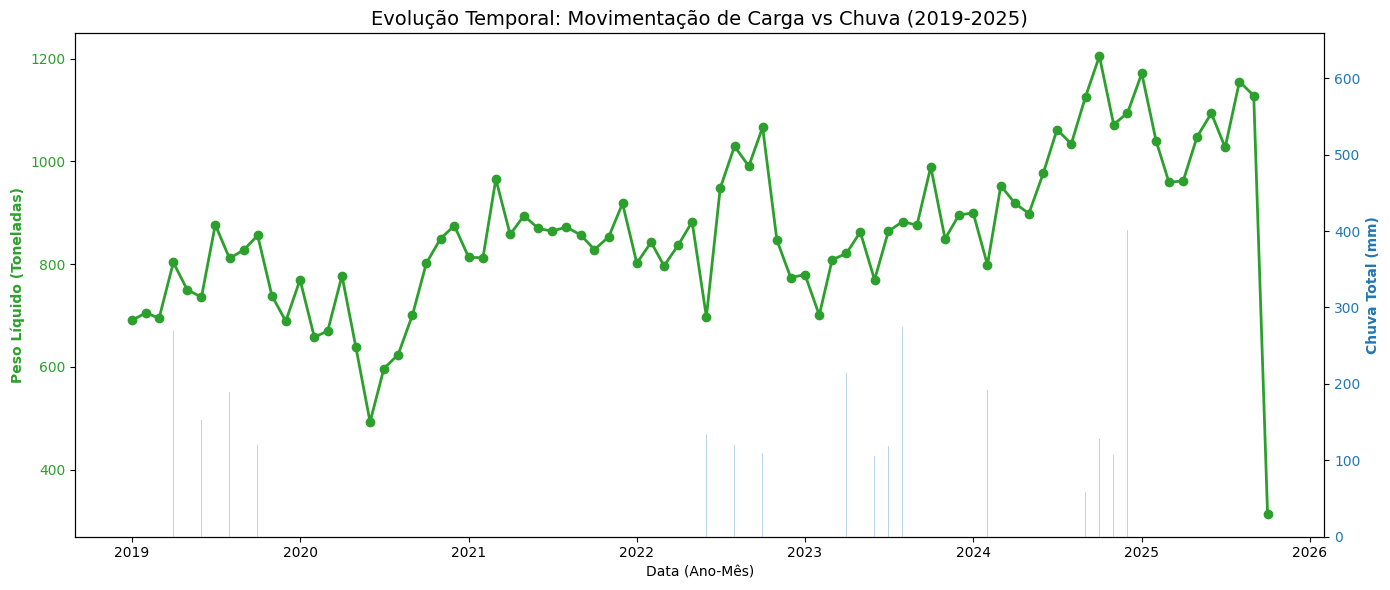

In [25]:
import matplotlib.pyplot as plt

#ordenando coluna data
carga['Data'] = pd.to_datetime(carga['ano'].astype(str) + '-' + carga['mes'].astype(str) + '-01')

fig, ax1 = plt.subplots(figsize=(14, 6))

#carga - linha verde
color = 'tab:green'
ax1.set_xlabel('Data (Ano-Mês)')
ax1.set_ylabel('Peso Líquido (Toneladas)', color=color, fontweight='bold')
ax1.plot(carga['Data'], carga['peso.liquido'], color=color, marker='o', linewidth=2, label='Carga Descarregada')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

#chuva - barra azul
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Chuva Total (mm)', color=color, fontweight='bold')
ax2.bar(carga['Data'], carga['Chuva_Total'], color=color, alpha=0.3, label='Chuva Total')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Evolução Temporal: Movimentação de Carga vs Chuva (2019-2025)', fontsize=14)
fig.tight_layout()
plt.show()

A correlação da Carga descarregada vs Chuva é negativa em **-0.3153**, o que explica o impacto da chuva na operação, onde maior Chuva(mm) menor a carga descarregada.

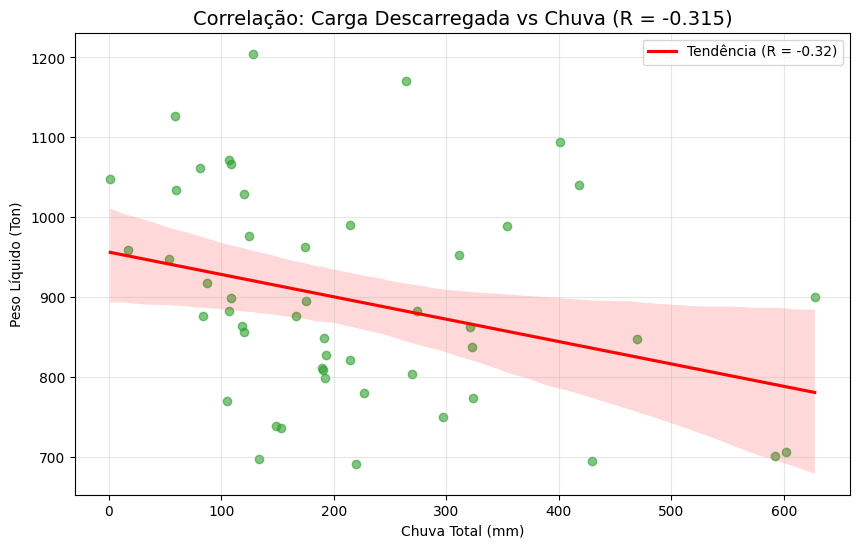

correlação: -0.3153


In [26]:
import seaborn as sns

#filtrando onde tem clima validado no data pra ver correlação entre as variaveis
df_valid_carga = carga[carga['clima_valido'] == True].copy()

correlacao = df_valid_carga['peso.liquido'].corr(df_valid_carga['Chuva_Total'])


plt.figure(figsize=(10, 6))

#scatterplot com linha de tendencia
sns.regplot(
    data=df_valid_carga,
    x='Chuva_Total',
    y='peso.liquido',
    color='tab:green',
    line_kws={'color': 'red', 'label': f'Tendência (R = {correlacao:.2f})'},
    scatter_kws={'alpha': 0.6}
)

plt.title(f'Correlação: Carga Descarregada vs Chuva (R = {correlacao:.3f})', fontsize=14)
plt.xlabel('Chuva Total (mm)')
plt.ylabel('Peso Líquido (Ton)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"correlação: {correlacao:.4f}")

Na correlação do Tempo total (entrada.ate.saida) vs Chuva Total, podemos perceber o inverso, com a correlação positiva em **0.3296** nos permitindo afirmar que conforme a chuva total (mm) aumenta, nosso tempo total de entrada até a saida também aumenta, impactando a operação do porto.

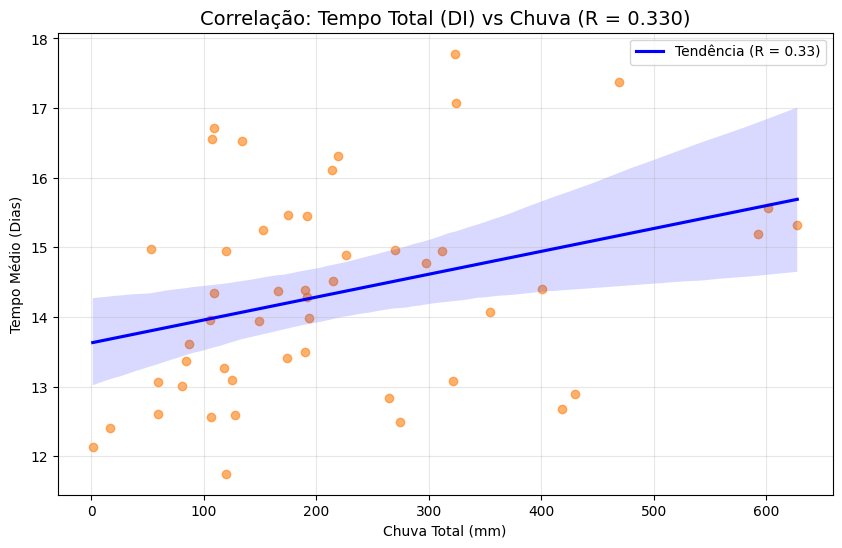

correlacao: 0.3296


In [27]:
#clima valido
df_valid_tempo = tempo[tempo['clima_valido'] == True].copy()

correlacao_tempo = df_valid_tempo['entrada.ate.saida'].corr(df_valid_tempo['Chuva_Total'])

plt.figure(figsize=(10, 6))

# Scatterplot
sns.regplot(
    data=df_valid_tempo,
    x='Chuva_Total',
    y='entrada.ate.saida',
    color='tab:orange',
    line_kws={'color': 'blue', 'label': f'Tendência (R = {correlacao_tempo:.2f})'},
    scatter_kws={'alpha': 0.6}
)

plt.title(f'Correlação: Tempo Total (DI) vs Chuva (R = {correlacao_tempo:.3f})', fontsize=14)
plt.xlabel('Chuva Total (mm)')
plt.ylabel('Tempo Médio (Dias)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"correlacao: {correlacao_tempo:.4f}")

As rajadas de vento (rajada máxima no mês) também mostra correlação positiva. Existem vários fatores onde podemos interpretar, seja pela sazonalidade dos ventos onde a operação momentaneamente interrompida, foi recuperada com estress de aumento de trabalho em dias que as rajadas de ventos estejam entre as zonas verdes e amarelas de operação.:

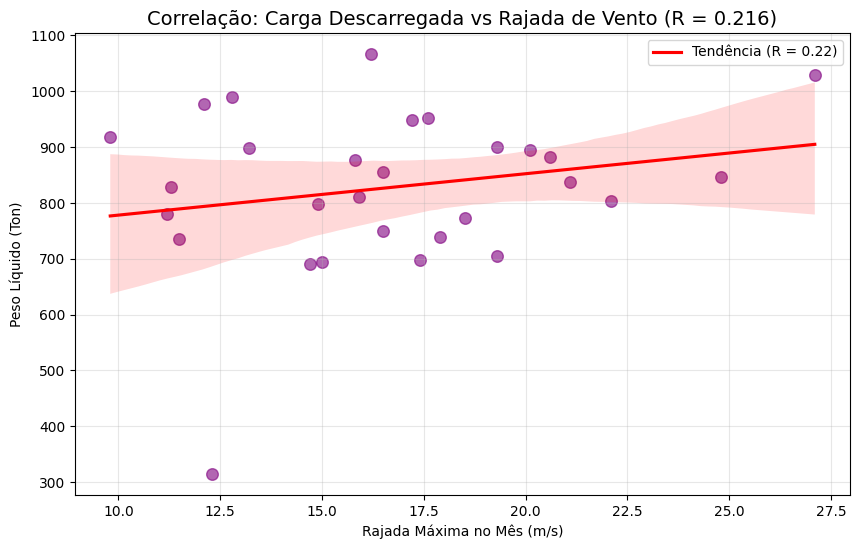

In [28]:
#linhas onde vento nao e nulo
df_vento_valid = carga[carga['Vento_Max_Mes'].notna()].copy()

#correlacao
corr_vento = df_vento_valid['peso.liquido'].corr(df_vento_valid['Vento_Max_Mes'])

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df_vento_valid,
    x='Vento_Max_Mes',
    y='peso.liquido',
    color='purple',
    line_kws={'color': 'red', 'label': f'Tendência (R = {corr_vento:.2f})'},
    scatter_kws={'alpha': 0.6, 's': 70}
)

plt.title(f'Correlação: Carga Descarregada vs Rajada de Vento (R = {corr_vento:.3f})', fontsize=14)
plt.xlabel('Rajada Máxima no Mês (m/s)')
plt.ylabel('Peso Líquido (Ton)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

O impacto do vento no tempo total da carga é a maior correlação que pudemos obter, indicando que quanto maior as rajadas de vento, mais tempo a carga permanece dentro do terminal.

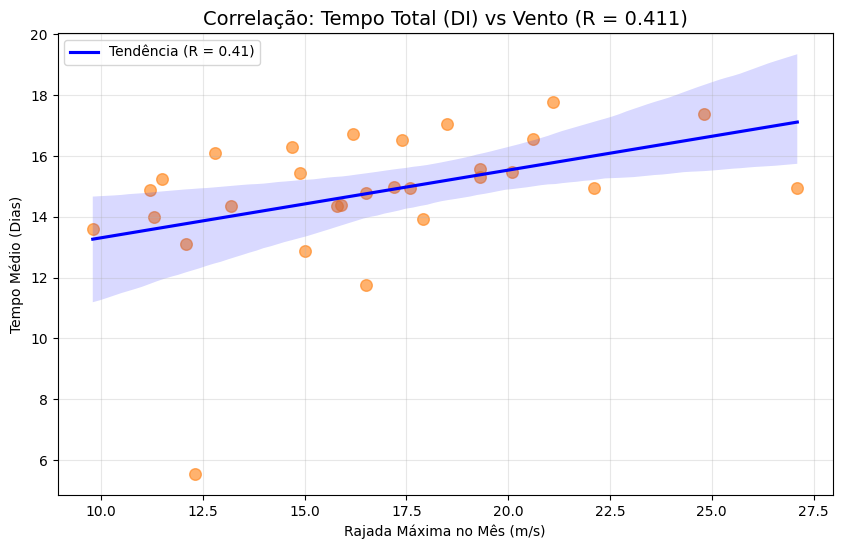

In [29]:
df_vento_tempo = tempo[tempo['Vento_Max_Mes'].notna()].copy() #filtro

corr_vento_tempo = df_vento_tempo['entrada.ate.saida'].corr(df_vento_tempo['Vento_Max_Mes']) #correlacao

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df_vento_tempo,
    x='Vento_Max_Mes',
    y='entrada.ate.saida',
    color='tab:orange',
    line_kws={'color': 'blue', 'label': f'Tendência (R = {corr_vento_tempo:.2f})'},
    scatter_kws={'alpha': 0.6, 's': 70}
)

plt.title(f'Correlação: Tempo Total (DI) vs Vento (R = {corr_vento_tempo:.3f})', fontsize=14)
plt.xlabel('Rajada Máxima no Mês (m/s)')
plt.ylabel('Tempo Médio (Dias)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Análise de sazonalidade

Para entender melhor a relação "estranha" onde o aumento do vento parecia acompanhar o aumento de carga, investigamos o comportamento mensal de ambas as variáveis.

No gráfico de sazonalidade do Vento (caixas azuis), fica evidente que Bertioga possui um regime de ventos muito mais severo no segundo semestre. Os meses de Agosto, Setembro, Outubro e Novembro apresentam as medianas mais altas e rajadas frequentes acima da zona de alerta.

Ao compararmos com o gráfico de sazonalidade da Carga (caixas verdes), percebemos que o pico de movimentação do porto (a safra) ocorre exatamente nos meses de Julho a Outubro.

Essa visualização mata a charada da correlação positiva: o porto opera em sua capacidade máxima justamente na época do ano em que o clima é mais hostil. O aumento de carga não é causado pelo vento, mas acontece ao mesmo tempo que ele, o que explica o estresse operacional e o aumento das filas (tempo) nesse período crítico.

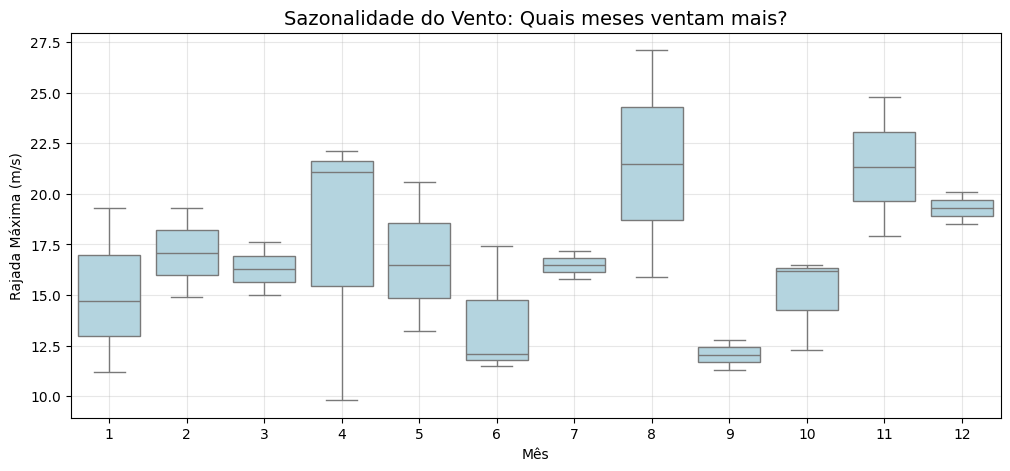

In [30]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=carga, x='mes', y='Vento_Max_Mes', color='lightblue') #data de carga pois ja merge com clima

plt.title('Sazonalidade do Vento: Quais meses ventam mais?', fontsize=14)
plt.ylabel('Rajada Máxima (m/s)')
plt.xlabel('Mês')
plt.grid(True, alpha=0.3)
plt.show()

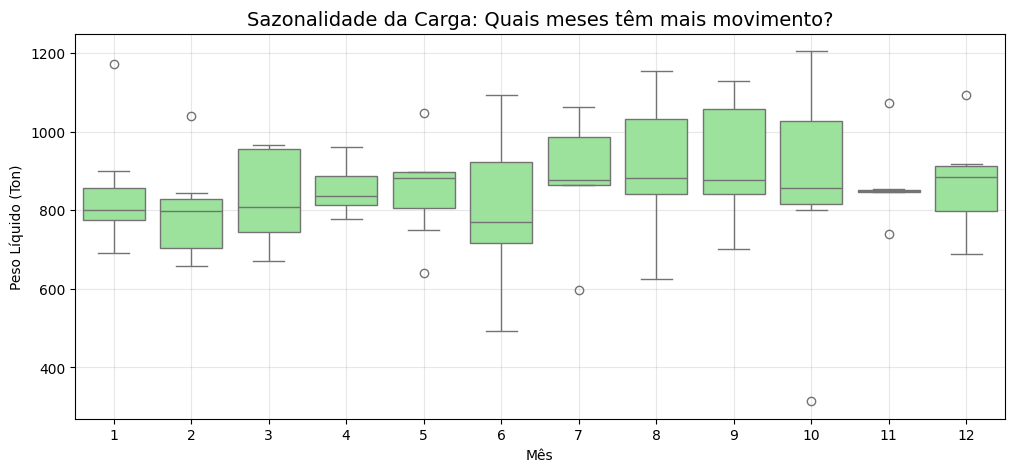

In [31]:
plt.figure(figsize=(12, 5))

sns.boxplot(data=carga, x='mes', y='peso.liquido', color='lightgreen')

plt.title('Sazonalidade da Carga: Quais meses têm mais movimento?', fontsize=14)
plt.ylabel('Peso Líquido (Ton)')
plt.xlabel('Mês')
plt.grid(True, alpha=0.3)
plt.show()

## 4. Mapa de calor

O heatmap resume todas as correlações numéricas dos nossos dados de Carga para identificar padrões de redundâncias.

**peso.liquido** e **qtde.teus** é de 0.98 (quase perfeita), indicando que as duas variáveis querem dizer a mesma coisa. Para nosso modelo, usaremos apenas **peso.liquido**

Pudemos também confirmar o que descobrimos na análise de sazonalidade, o cruzamento entre **vento_max_mes** e **peso.liquido** nos mostram moderada correlação, nos confirmando que os meses de maior vento coincidem com os meses de maior movimentação de carga.

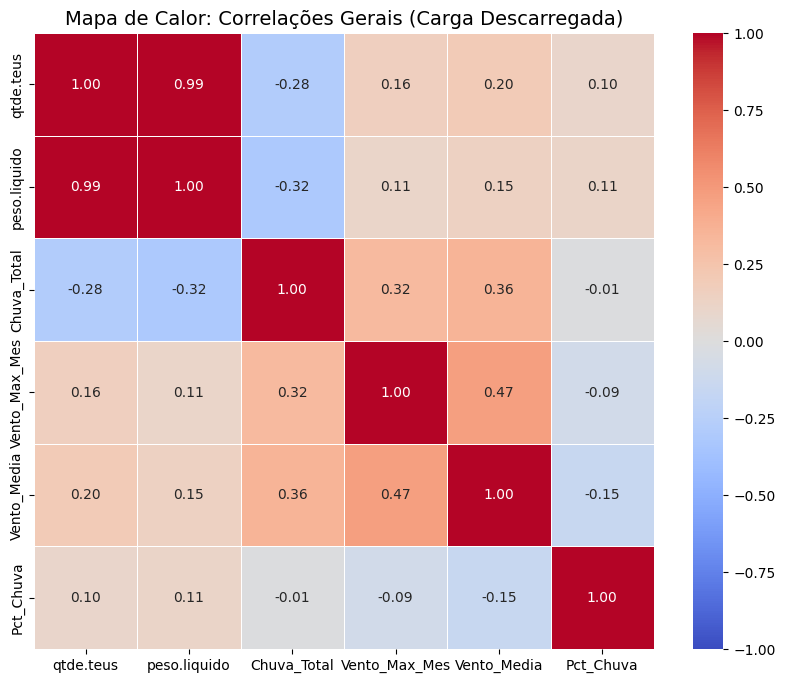

In [32]:
#filtro
colunas_interesse = [
    'qtde.teus', 'peso.liquido',    #carga
    'Chuva_Total', 'Vento_Max_Mes', #clima
    'Vento_Media', 'Pct_Chuva'
]

corr_matrix = carga[carga['clima_valido'] == True][colunas_interesse].corr() #matriz de correlacao

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title('Mapa de Calor: Correlações Gerais (Carga Descarregada)', fontsize=14)
plt.show()

## 6. Sensibilidade por etapa

Nesta etapa, desagregamos o tempo total em suas etapas e calculamos a correlação da chuva com cada uma separadamente, com objetivo de validar se os dados refletem a realidade física do porto.

O gráfico nos mostra que a **burocracia** de entrada tem um impacto menor (0.24), confirmando que o clima afeta menos a parte de digitação inicial, mas ainda existe alguma influência.

O destaque ficou para **doc.import.ate.desembaraco** que lidera com 0.39, seguido pelo **porto** com 0.34. Isso nos prova que a chuva castiga principalmente a vistoria física (abrir contêiner no pátio para fiscal) e a operação de cais. Já a saída final do gate sofreu menos (0.14).

Essa análise é fundamental para o projeto pois demonstra que a correlação do tempo total (0.33) não é coincidência, mas uma média ponderada dos gargalos que a chuva causa na vistoria e na operação do navio.

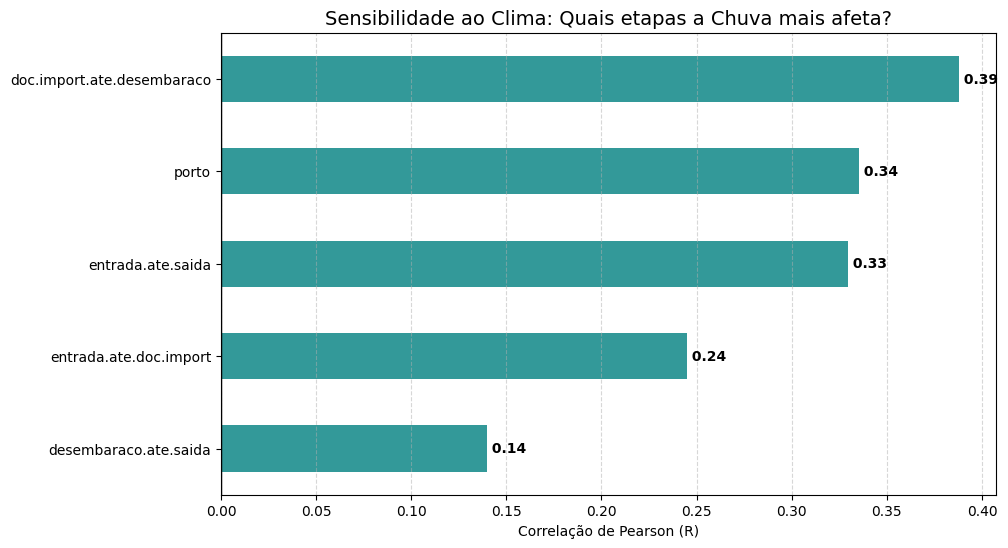

In [33]:
#filtro das burocracias
colunas_etapas = [
    'entrada.ate.doc.import',
    'doc.import.ate.desembaraco',
    'desembaraco.ate.saida',
    'porto',
    'entrada.ate.saida'
]

df_tempo_valid = tempo[tempo['clima_valido'] == True].copy()

correlacoes_chuva = df_tempo_valid[colunas_etapas].corrwith(df_tempo_valid['Chuva_Total']) #matriz de correlacao

plt.figure(figsize=(10, 6))
correlacoes_chuva.sort_values().plot(kind='barh', color='teal', alpha=0.8)

plt.title('Sensibilidade ao Clima: Quais etapas a Chuva mais afeta?', fontsize=14)
plt.xlabel('Correlação de Pearson (R)')
plt.axvline(x=0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for index, value in enumerate(correlacoes_chuva.sort_values()):
    plt.text(value, index, f' {value:.2f}', va='center', fontweight='bold')

plt.show()

## 7. Conclusão

Neste EDA, exploramos a relação entre as condições climáticas de Bertioga e a eficiência operacional do porto, utilizando dados históricos de 2019 a 2025.

Nossos dados contaram uma história consistente e reveladora:

Primeiro, o clima custa eficiência. Confirmamos que tanto a chuva quanto o vento aumentam o tempo total de operação. A correlação positiva (0.33) no tempo de entrada até a saída prova que o clima adverso gera filas e atrasos mensuráveis.

Segundo, resolvemos a pegadinha do vento e da safra. A correlação positiva entre vento e volume de carga, que parecia estranha no começo, foi explicada pela sazonalidade. Descobrimos que o porto opera na capacidade máxima exatamente nos meses em que as rajadas de vento são mais frequentes e intensas (Agosto a Novembro), criando um cenário de tempestade perfeita para o estresse operacional.

Por fim, comprovamos o impacto físico. Ao desagregar os tempos, validamos que a chuva impacta severamente a vistoria física (0.39) e a operação de cais (0.34), enquanto a burocracia de escritório permanece imune. Isso garante que nosso futuro modelo preditivo estará baseando suas previsões em gargalos reais, e não em ruído.

Com essas validações, encerramos a fase exploratória com a segurança de que temos as variáveis certas (Chuva, Vento Máximo e Mês) para alimentar nosso modelo e prever os dias de atraso na operação.